# NER using openai

## Install openai & Create Job

In [ ]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.9/312.9 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import os as os
from google.colab import drive
drive.mount('/content/drive')

import tqdm

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/ModernAI_HR_project/Data')
df = pd.read_csv("UpdatedResumeDataSet.csv")
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
from openai import OpenAI
import os
os.environ["OPENAI_API_KEY"] = ""
client = OpenAI()

prompt = """You are a LinkedIn recruiter. Your task is to extract skills from the provided resume. You should output the results in JSON format, where each key represents a skill category and the value is a list of corresponding skill names from the resume. If no skills are found for a specific category, the list can be empty.

Skill Categories:
1. Technical Skills
2. Soft Skills
3. Leadership Skills
4. Project Management
5. Analytical Skills
6. Sales and Marketing
7. Customer Service
8. Design and Creativity
9. Industry-Specific Skills
10. Language Skills
11. Other

Important: Do NOT add skills or information that do not appear in the resume. The final JSON must contain only skills extracted from the resume. Each key should have a list of skills, even if it’s empty.

Resume:
{resume}
"""

response = client.chat.completions.create(
  model="gpt-3.5-turbo-0125",
  response_format={ "type": "json_object" },
  temperature = 0 ,
  messages=[
    {"role": "user", "content":prompt.format(resume = df.iloc[0,1])}
  ]
)
print(response.choices[0].message.content)

{
    "Technical Skills": [
        "Python",
        "pandas",
        "numpy",
        "scipy",
        "scikit-learn",
        "matplotlib",
        "Sql",
        "Java",
        "JavaScript/JQuery",
        "Regression",
        "SVM",
        "NaÃ¯ve Bayes",
        "KNN",
        "Random Forest",
        "Decision Trees",
        "Boosting techniques",
        "Cluster Analysis",
        "Word Embedding",
        "Sentiment Analysis",
        "Natural Language processing",
        "Dimensionality reduction",
        "Topic Modelling (LDA, NMF)",
        "PCA & Neural Nets",
        "Mysql",
        "SqlServer",
        "Cassandra",
        "Hbase",
        "ElasticSearch",
        "D3.js",
        "DC.js",
        "Plotly",
        "kibana",
        "ggplot",
        "Tableau",
        "Regular Expression",
        "HTML",
        "CSS",
        "Angular 6",
        "Logstash",
        "Kafka",
        "Python Flask",
        "Git",
        "Docker",
        "computer vision - O

In [ ]:
from tqdm import tqdm
df["gpt_label"] = ""
for index, row in tqdm(df.iterrows(), total=len(df), desc="Processing"):
    response = client.chat.completions.create(
    model="gpt-3.5-turbo-0125",
    response_format={ "type": "json_object" },
    temperature = 0 ,
    messages=[
      {"role": "user", "content":prompt.format(resume = row['Resume'])}
    ]
  )
    df.loc[index, "gpt_label"]  = response.choices[0].message.content

Processing: 100%|██████████| 962/962 [47:56<00:00,  2.99s/it]


## Result from openai gpt label skills

In [ ]:
df

,Category,Resume,gpt_label
0,Data Science,Skills * Programming Languages: Python (pandas...,"{\n ""Technical Skills"": [\n ""Python""..."
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,"{\n ""Technical Skills"": [\n ""Python""..."
2,Data Science,"Areas of Interest Deep Learning, Control Syste...","{\n ""Technical Skills"": [\n ""Program..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,"{\n ""Technical Skills"": [\n ""R"",\n ..."
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...","{\n ""Technical Skills"": [\n ""Data St..."
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,"{\n ""Technical Skills"": [\n ""MS Offi..."
958,Testing,â Willingness to accept the challenges. â ...,"{\n ""Technical Skills"": [\n ""Electro..."
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...","{\n ""Technical Skills"": [\n ""Testing..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,"{\n ""Technical Skills"": [\n ""MS-Powe..."


In [ ]:
df.to_csv('/content/drive/My Drive/temp_df.csv', index=False)

In [ ]:
import pandas as pd
import os as os
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/")

Mounted at /content/drive


In [ ]:
df = pd.read_csv('temp_df.csv')

In [ ]:
df.head()

,Category,Resume,gpt_label
0,Data Science,Skills * Programming Languages: Python (pandas...,"{\n ""Technical Skills"": [\n ""Python""..."
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,"{\n ""Technical Skills"": [\n ""Python""..."
2,Data Science,"Areas of Interest Deep Learning, Control Syste...","{\n ""Technical Skills"": [\n ""Program..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,"{\n ""Technical Skills"": [\n ""R"",\n ..."
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...","{\n ""Technical Skills"": [\n ""Data St..."


In [ ]:
import json

# Drop Error one row
df = df.drop(518)
df = df.reset_index()

# Convert JSON strings to dictionaries
df['gpt_label'] = df['gpt_label'].apply(json.loads)

# Flatten JSON dictionaries into separate columns
json_df = pd.json_normalize(df['gpt_label'])

# Concatenate the original DataFrame with the flattened DataFrame
result_df = pd.concat([df, json_df], axis=1).drop(columns=['gpt_label'])

result_df

,index,Category,Resume,Technical Skills,Soft Skills,Leadership Skills,Project Management,Analytical Skills,Sales and Marketing,Customer Service,Design and Creativity,Industry-Specific Skills,Language Skills,Other
0,0,Data Science,Skills * Programming Languages: Python (pandas...,"[Python, pandas, numpy, scipy, scikit-learn, m...",[],[],[],[],[],[],[],[],[],[]
1,1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,"[Python, Statsmodels, AWS, Machine learning, S...",[],[],[],[],[],[],[],[],[],[]
2,2,Data Science,"Areas of Interest Deep Learning, Control Syste...","[Programming Matlab, Python, Java, LabView, Py...",[],[],[],"[Data Analysis, Machine Learning, Mathematics]",[],[],[],[Electrical Engineering],[],"[Excel, SQL]"
3,3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,"[R, Python, SAP HANA, Tableau, SAP HANA SQL, S...",[],[],[],[],[],[],[],[],[],[]
4,4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...","[Data Structure, C, Data Analysis, Python, Cor...",[],[],[],[],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,957,Testing,Computer Skills: â¢ Proficient in MS office (...,"[MS Office, Word, Excel]","[Hard working, Loyalty, Creativity, Self-motiv...",[],[],[],[],[],[],[],[],[]
957,958,Testing,â Willingness to accept the challenges. â ...,"[Electronic system testing, Developing test pl...",[Team Player],[],[],[],[],[],[],[],"[C, C++]","[Positive thinking, Good learner]"
958,959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...","[Testing, Quality Control, Routine Testing, Ty...","[Quick Learner, Eagerness to Learn, Competitiv...",[],[],[],[],[],[],[],[],[]
959,960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,"[MS-Power Point, MS - Office, C, Protius (PCB ...",NaN,NaN,"[Speed Control of DC Motor Using Heart Beats, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Prepare data to proceed Counter counting frequency

In [ ]:
# Replace NaN with empty list []
df = result_df.drop(columns="index")
skill_lists = ['Technical Skills', 'Soft Skills',
       'Leadership Skills', 'Project Management', 'Analytical Skills',
       'Sales and Marketing', 'Customer Service', 'Design and Creativity',
       'Industry-Specific Skills', 'Language Skills', 'Other']

df[skill_lists] = df[skill_lists].fillna('[]')
df.isna().sum()

Category                    0
Resume                      0
Technical Skills            0
Soft Skills                 0
Leadership Skills           0
Project Management          0
Analytical Skills           0
Sales and Marketing         0
Customer Service            0
Design and Creativity       0
Industry-Specific Skills    0
Language Skills             0
Other                       0
dtype: int64

In [ ]:
# Combine Skills

df['all_skills'] = [[] for _ in range(len(df))]

# Iterate over each row of the DataFrame
for index, row in df.iterrows():
    all_skills = []  # Initialize a list to store all skills for the current row
    # Iterate over each specified skill column
    for col in skill_lists:
        # Retrieve the list of skills from the current column and extend the 'all_skills' list
        all_skills.extend(row[col])
    # Assign the concatenated list of skills to the 'all_skills' column for the current row
    df.at[index, 'all_skills'] = all_skills

# Optionally, convert the list of skills to a comma-separated string
df['all_skills'] = df['all_skills'].apply(lambda x: ', '.join(x))

In [ ]:
df.drop(columns=skill_lists, inplace=True)
df.head(3)

,Category,Resume,all_skills
0,Data Science,Skills * Programming Languages: Python (pandas...,"Python, pandas, numpy, scipy, scikit-learn, ma..."
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,"Python, Statsmodels, AWS, Machine learning, Sk..."
2,Data Science,"Areas of Interest Deep Learning, Control Syste...","Programming Matlab, Python, Java, LabView, Pyt..."


In [ ]:
df.to_csv("gpt_skill_ner.csv")

In [ ]:
df['List_Skills'] = df['all_skills'].str.split(', ')
df.head(3)

,Category,Resume,all_skills,List_Skills
0,Data Science,Skills * Programming Languages: Python (pandas...,"Python, pandas, numpy, scipy, scikit-learn, ma...","[Python, pandas, numpy, scipy, scikit-learn, m..."
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,"Python, Statsmodels, AWS, Machine learning, Sk...","[Python, Statsmodels, AWS, Machine learning, S..."
2,Data Science,"Areas of Interest Deep Learning, Control Syste...","Programming Matlab, Python, Java, LabView, Pyt...","[Programming Matlab, Python, Java, LabView, Py..."


# Use Counter to find the most frequency skills

In [ ]:
import nltk
from nltk.corpus import stopwords
import string
from collections import Counter

# Download NLTK stopwords data (only need to run this once)
nltk.download('stopwords')

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Define punctuation marks to remove
punctuation_marks = set(string.punctuation)

# Initialize an empty dictionary to store word frequencies for each job category
word_frequencies_by_category = {}

# Iterate over each job category
for category in df['Category'].unique():
    # Get all cleaned resumes for the current category
    List_Skills = df[df['Category'] == category]['List_Skills']

    # Flatten the list of skills
    List_Skills = [word.lower() for sublist in List_Skills for word in sublist]

    # Remove stopwords and punctuation marks
    List_Skills = [word for word in List_Skills if word.lower() not in stop_words and word not in punctuation_marks]

    # Calculate word frequencies using Counter
    word_frequencies = Counter(List_Skills)

    # Store word frequencies for the current category
    word_frequencies_by_category[category] = word_frequencies

# Print word frequencies for each category
for category, word_frequencies in word_frequencies_by_category.items():
    print(f"Word frequencies for category '{category}':")
    print(word_frequencies)
    print()

Word frequencies for category 'Data Science':
Counter({'python': 40, 'machine learning': 32, 'sql': 16, 'tableau': 16, 'pandas': 12, 'numpy': 12, 'html': 12, 'deep learning': 12, 'data analysis': 12, 'nlp': 12, 'scipy': 8, 'scikit-learn': 8, 'matplotlib': 8, 'java': 8, 'svm': 8, 'knn': 8, 'css': 8, 'r': 8, 'c': 8, 'data science': 8, 'nltk': 6, 'open cv': 5, 'javascript/jquery': 4, 'regression': 4, 'naã¯ve bayes': 4, 'random forest': 4, 'decision trees': 4, 'boosting techniques': 4, 'cluster analysis': 4, 'word embedding': 4, 'sentiment analysis': 4, 'natural language processing': 4, 'dimensionality reduction': 4, 'mysql': 4, 'sqlserver': 4, 'cassandra': 4, 'hbase': 4, 'elasticsearch': 4, 'd3.js': 4, 'dc.js': 4, 'plotly': 4, 'kibana': 4, 'ggplot': 4, 'regular expression': 4, 'angular 6': 4, 'logstash': 4, 'kafka': 4, 'python flask': 4, 'git': 4, 'docker': 4, 'statsmodels': 4, 'aws': 4, 'sklearn': 4, 'keras': 4, 'programming matlab': 4, 'labview': 4, 'python webframework-django': 4, 'fla

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


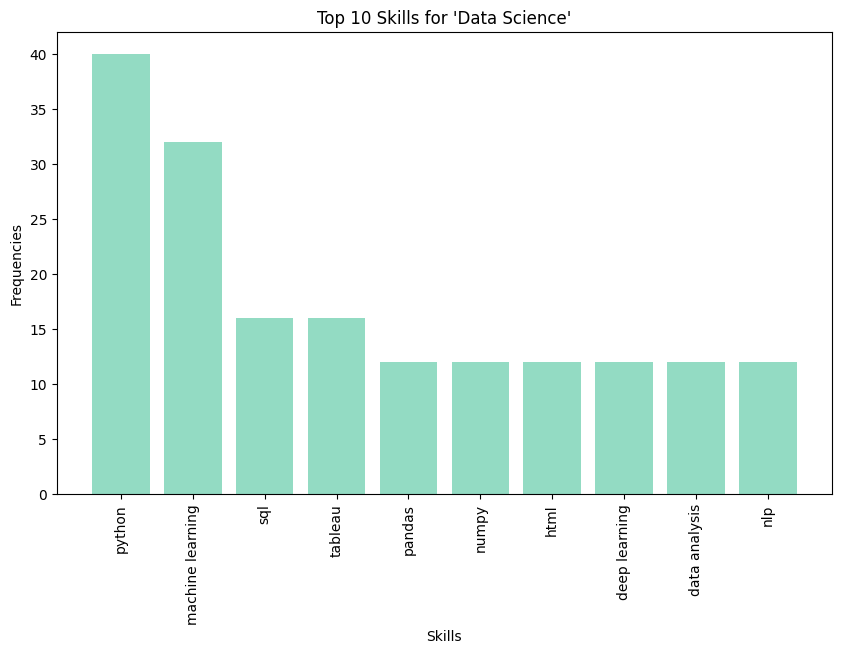

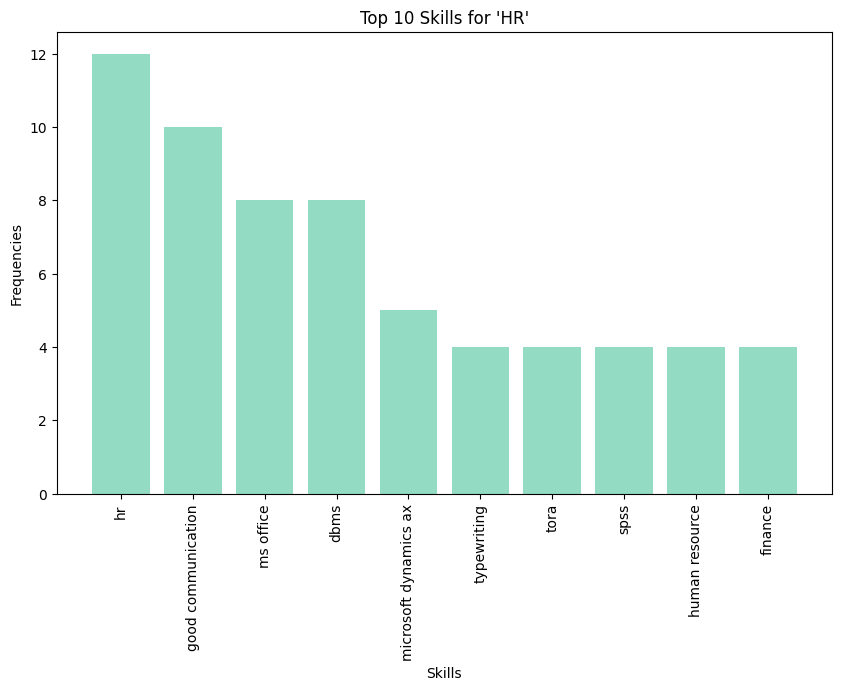

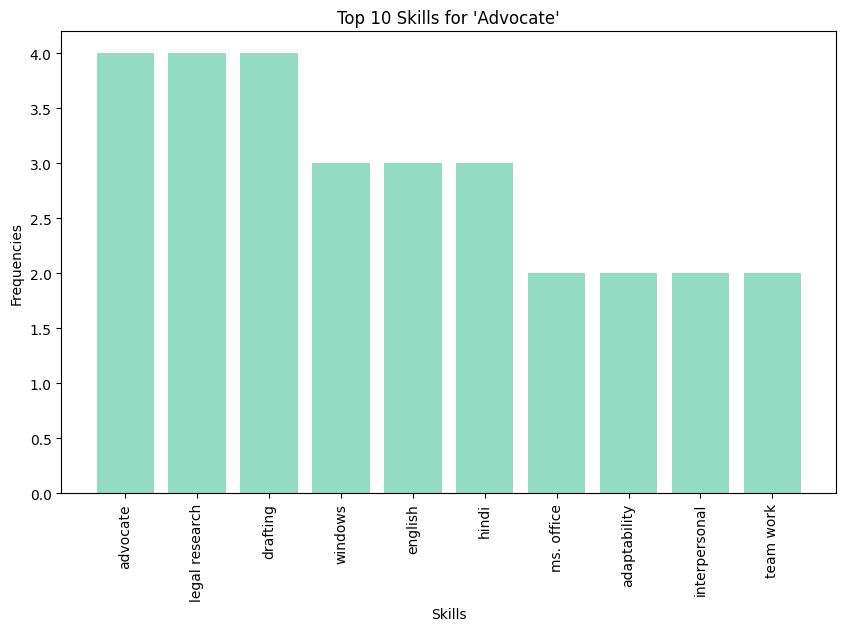

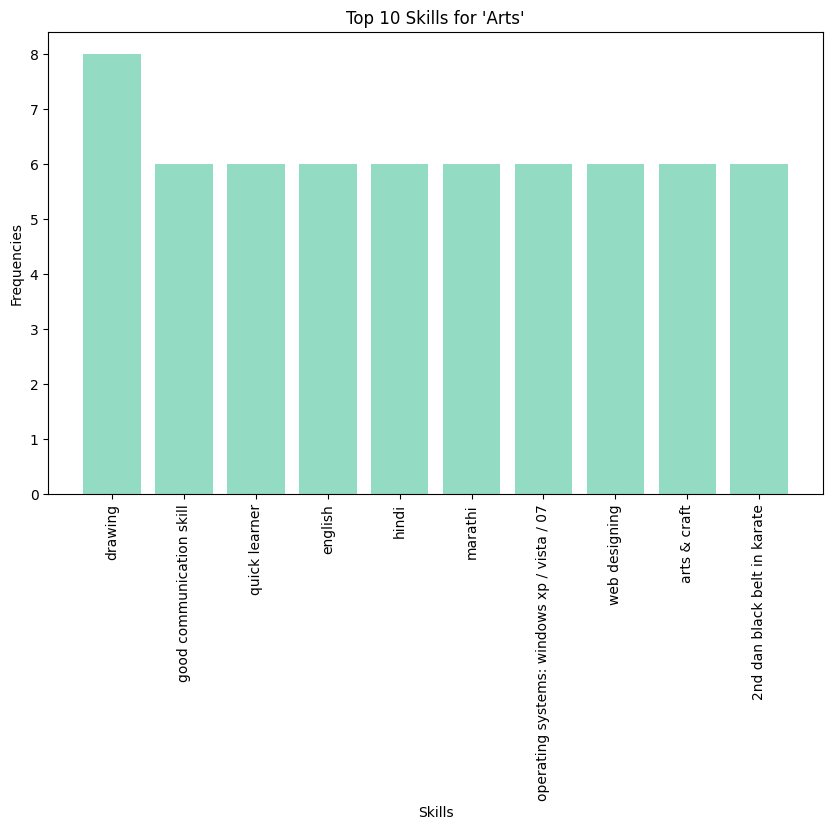

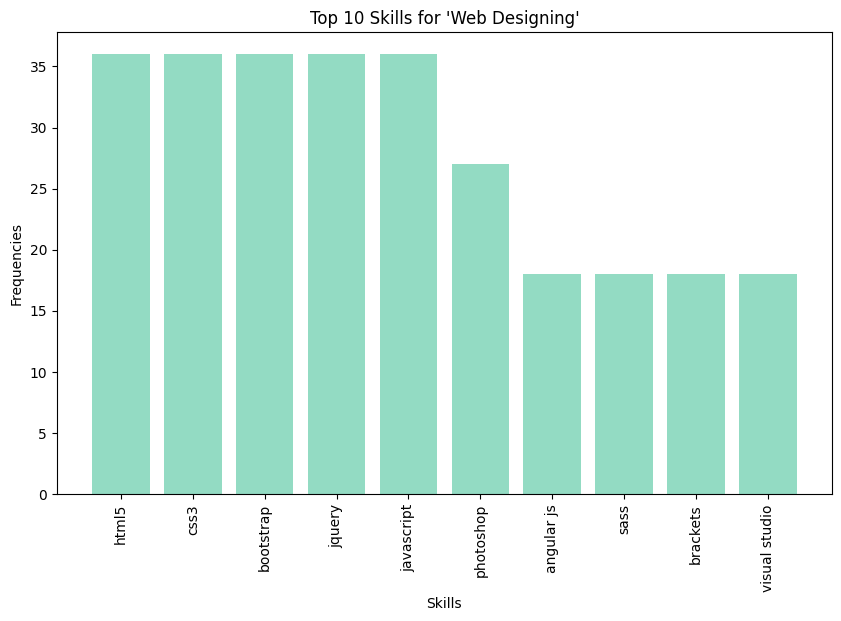

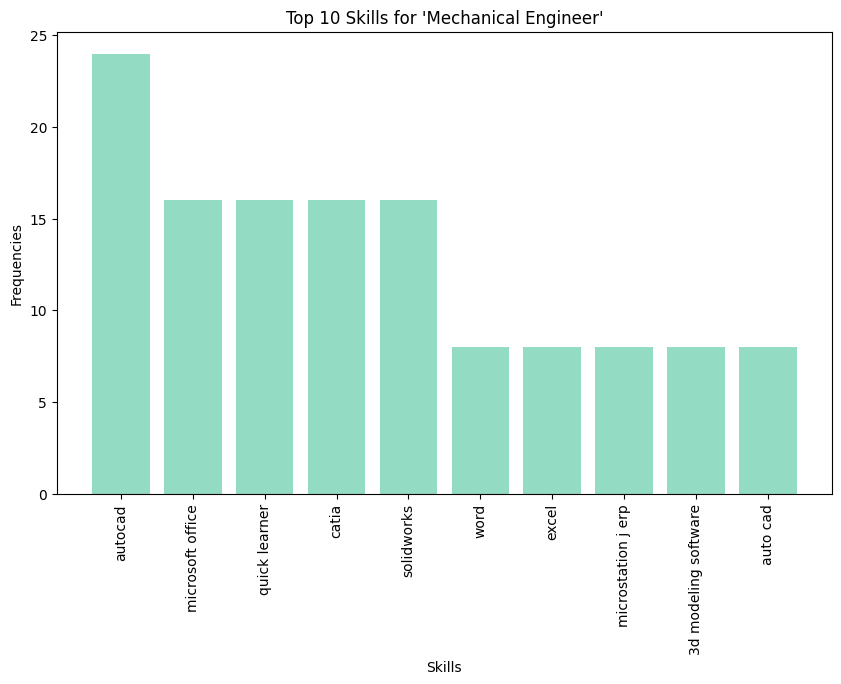

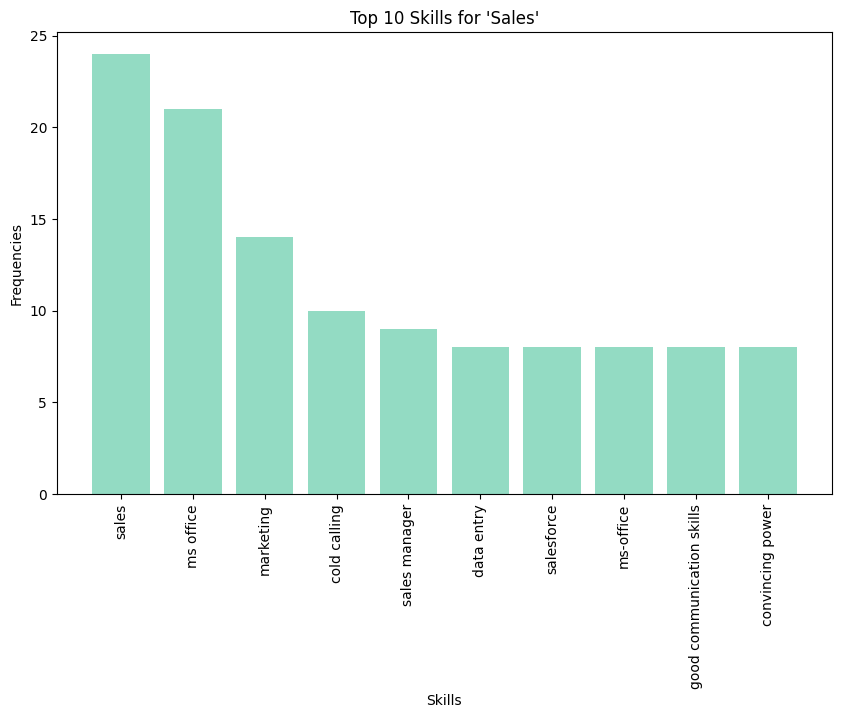

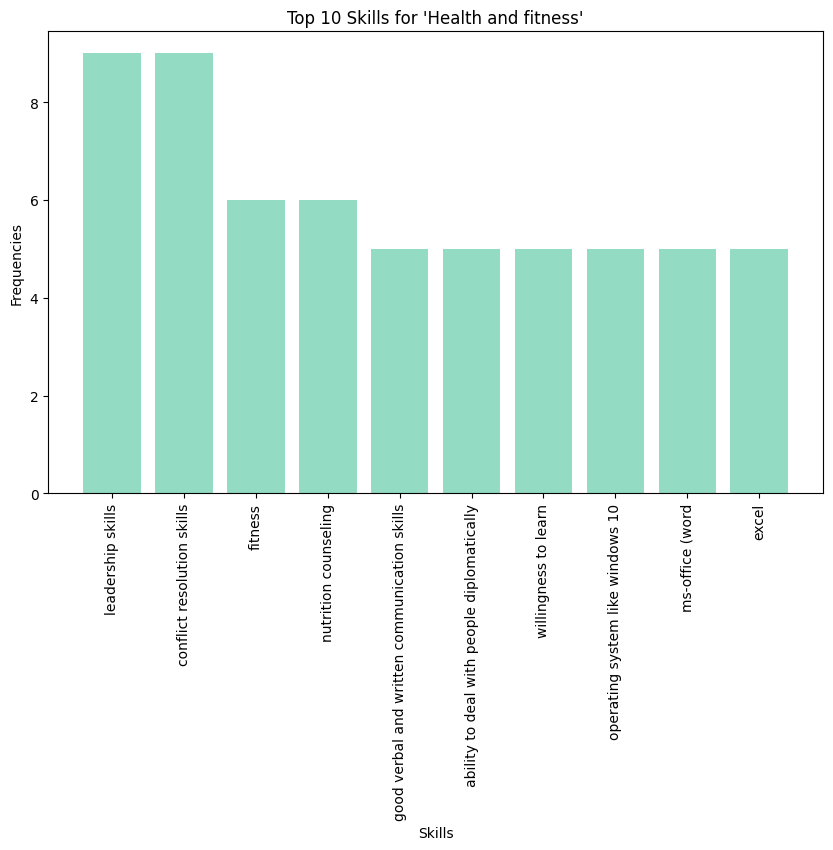

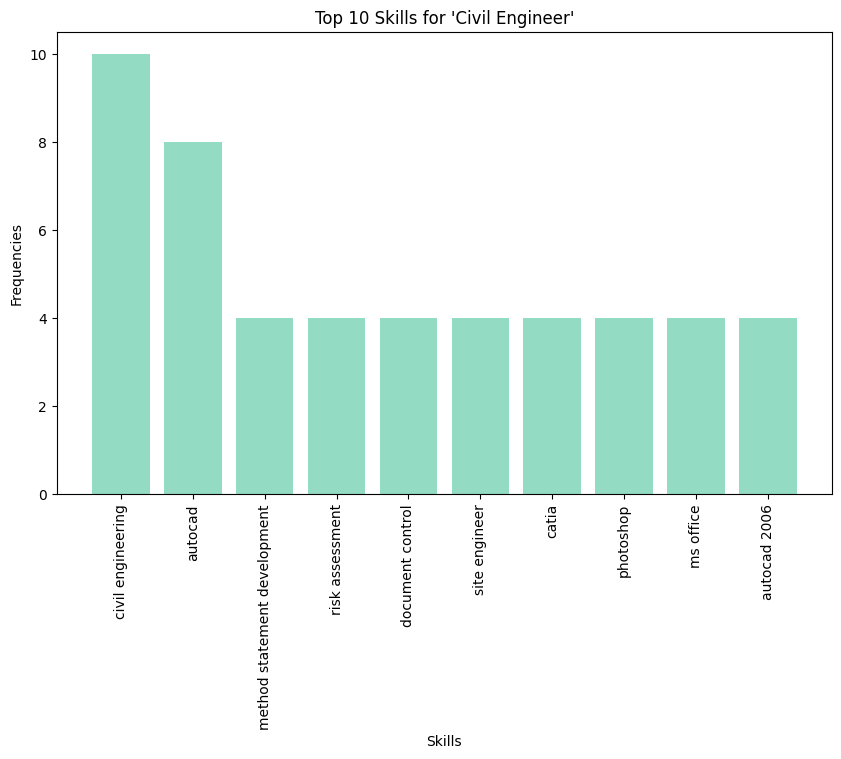

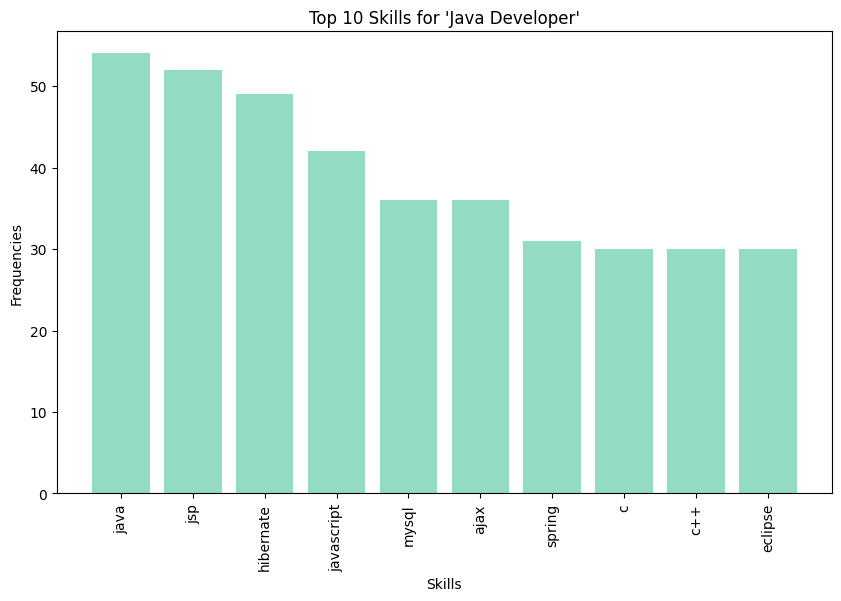

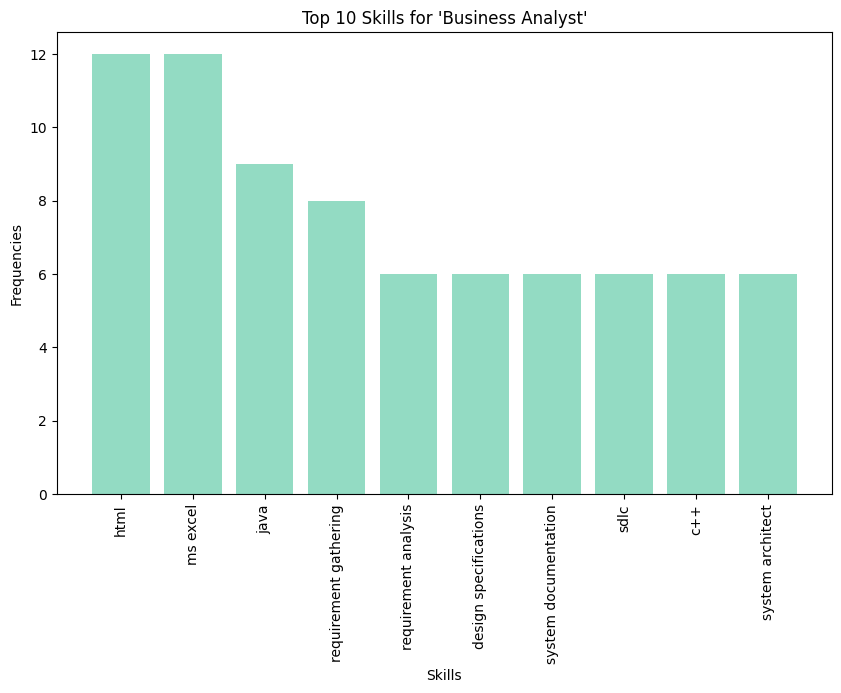

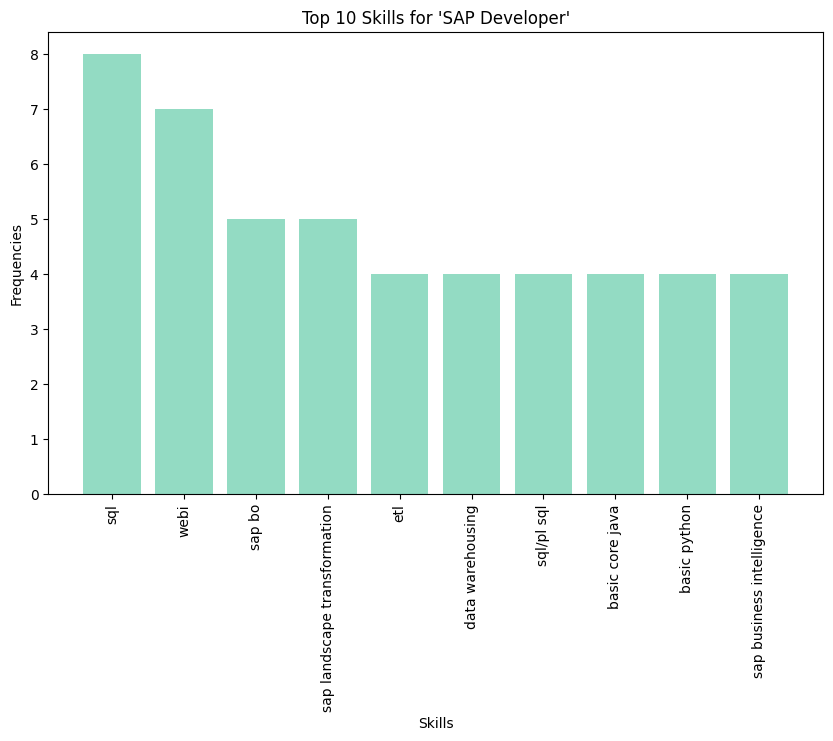

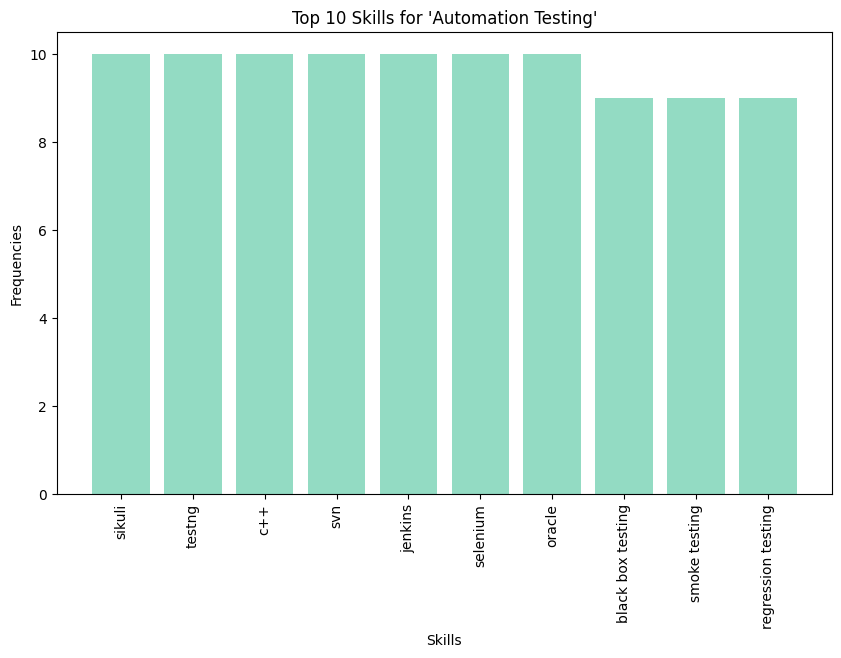

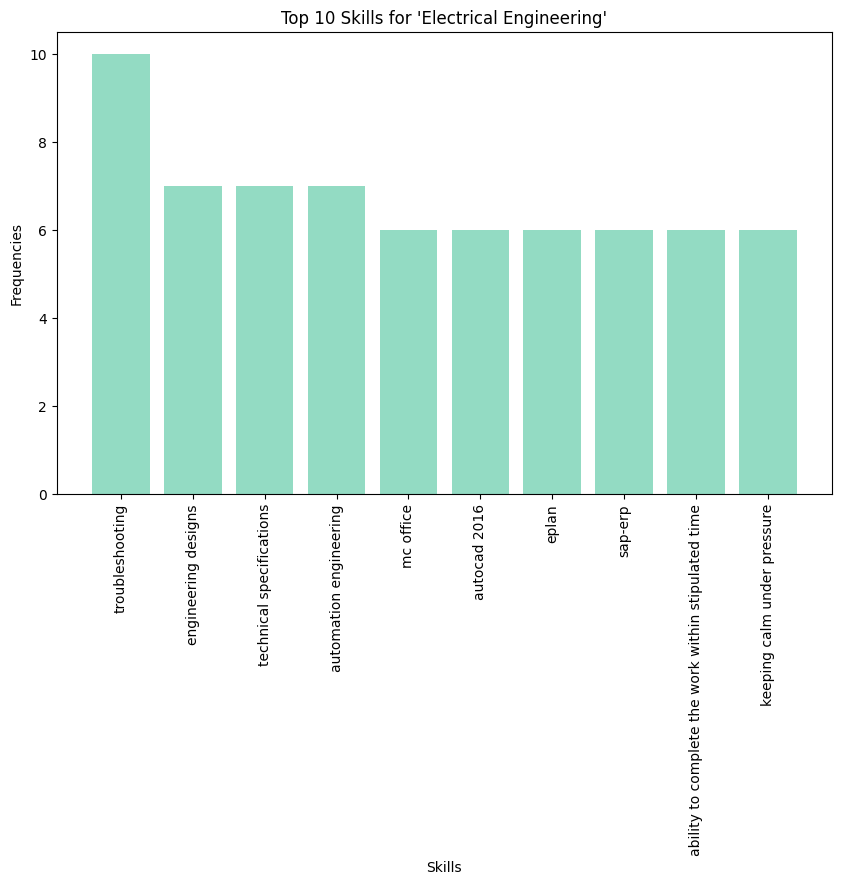

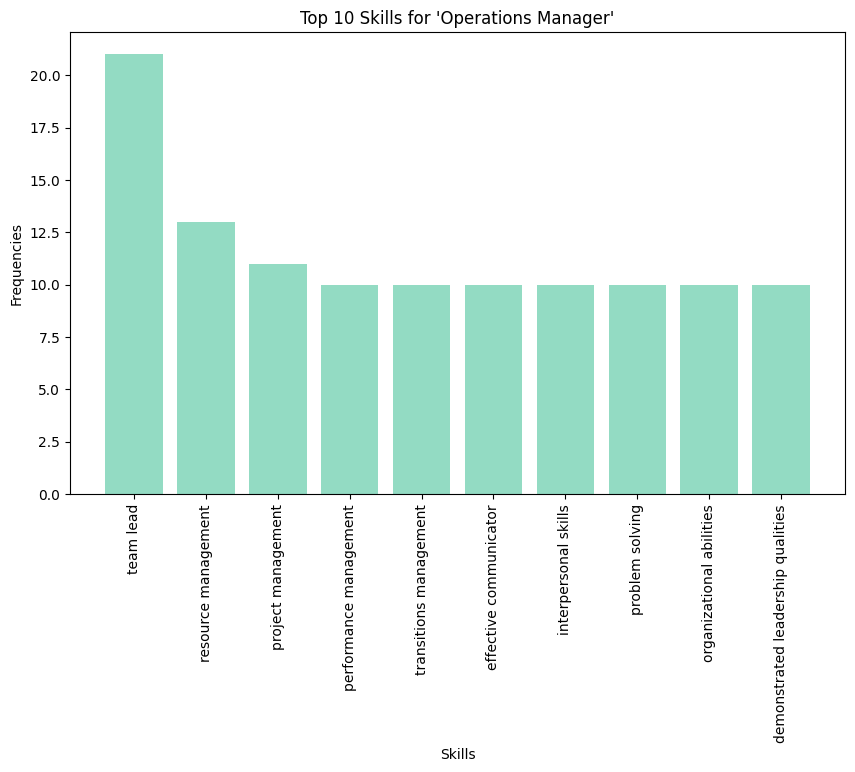

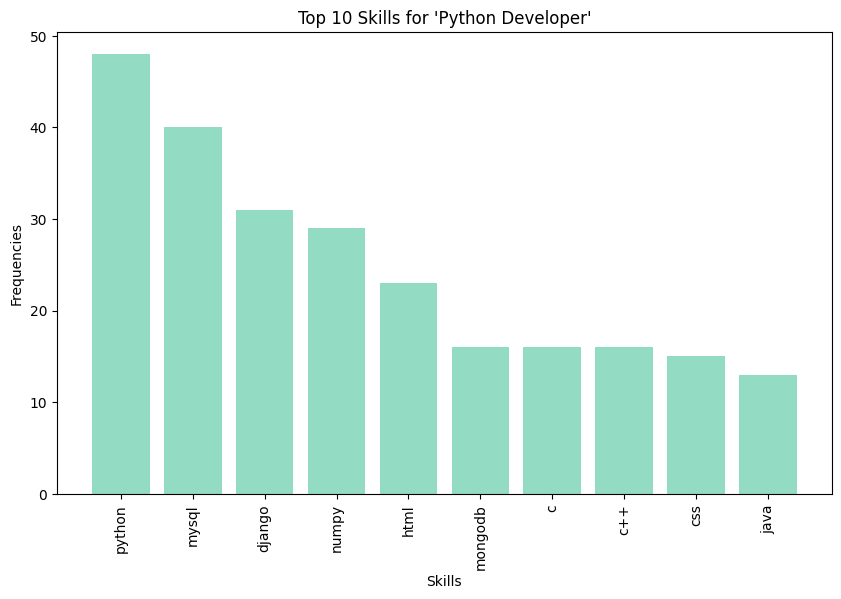

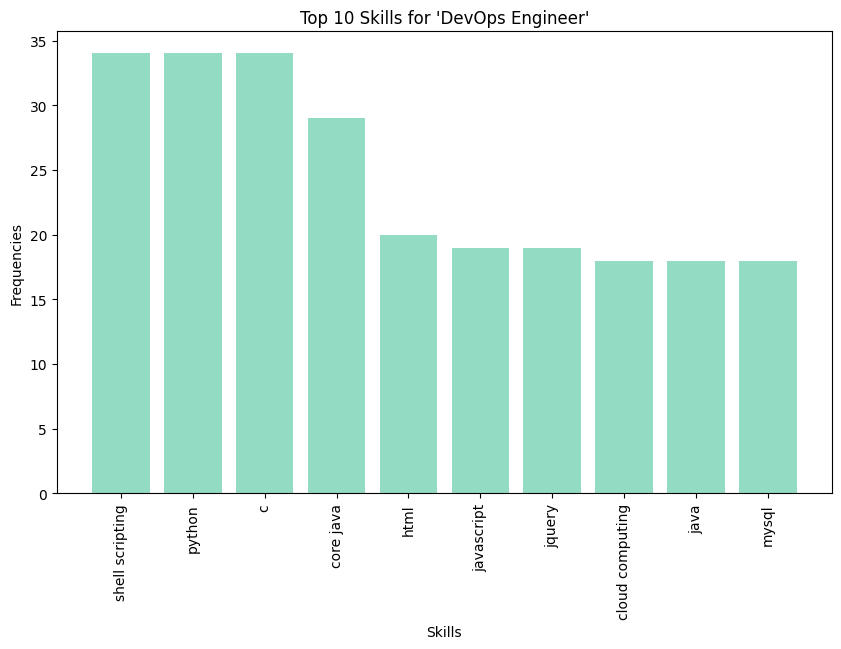

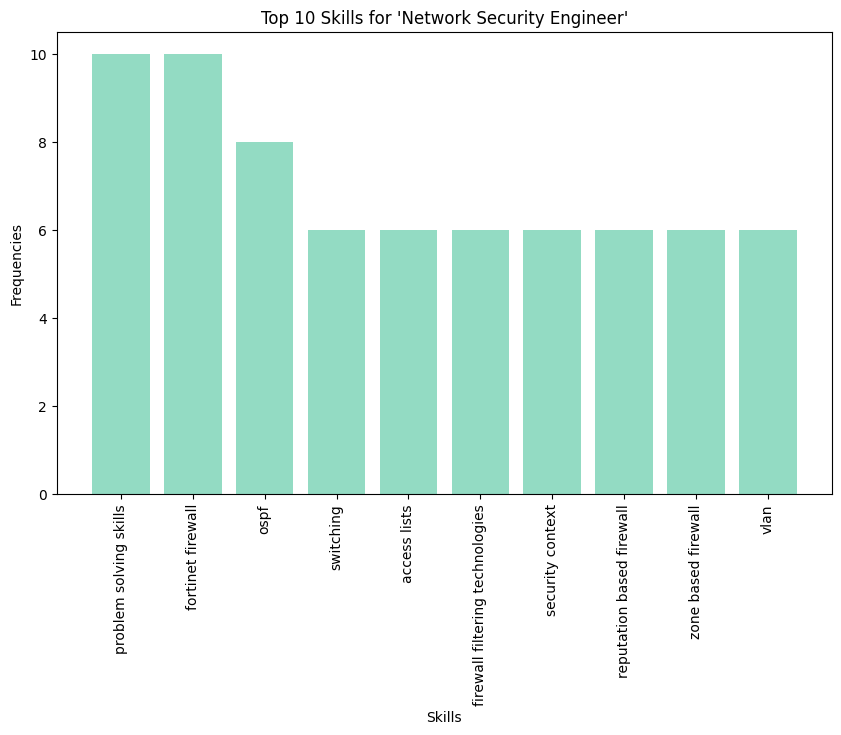

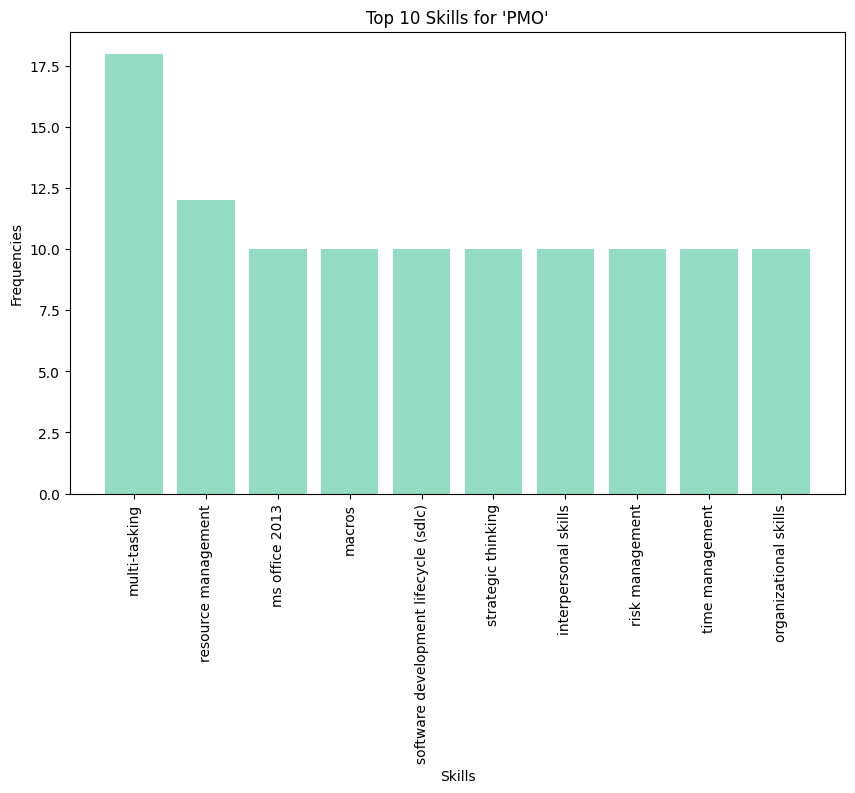

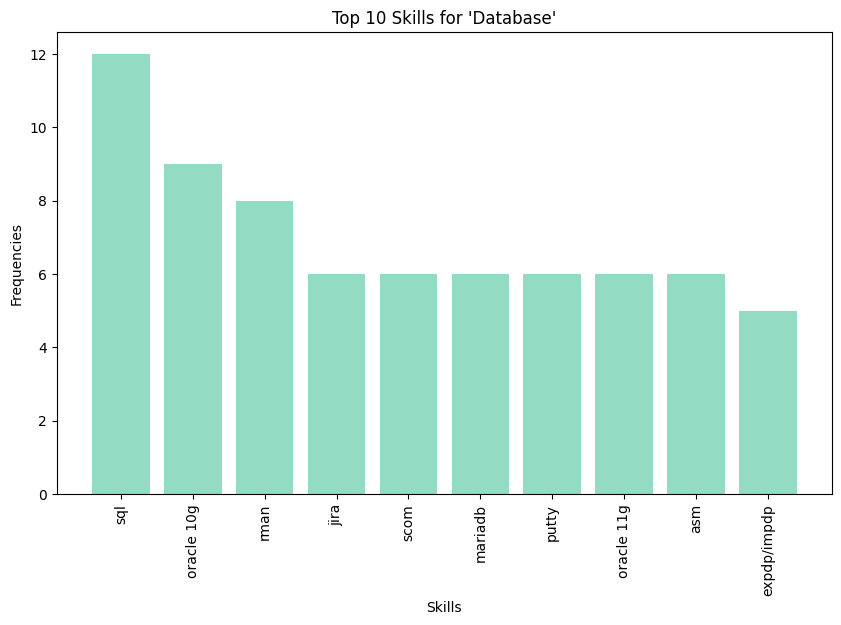

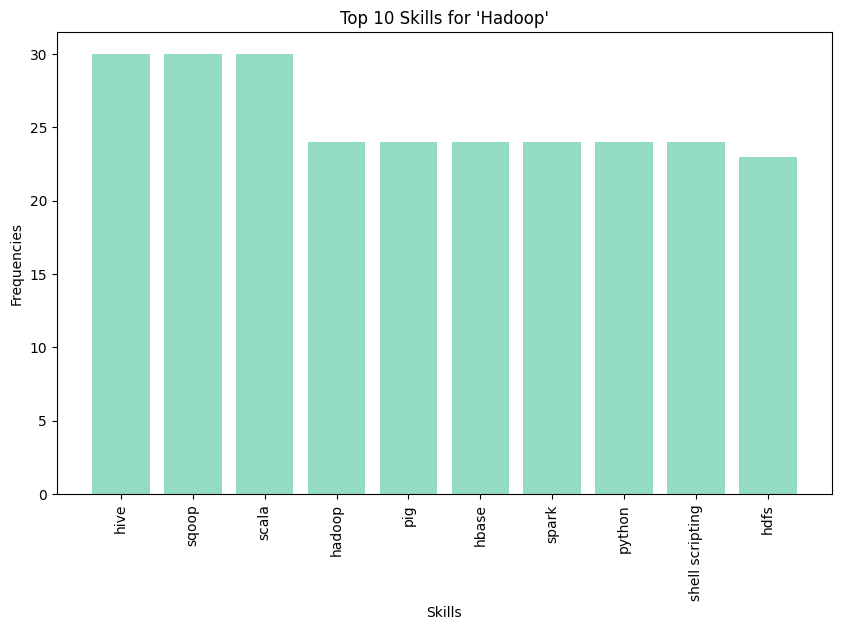

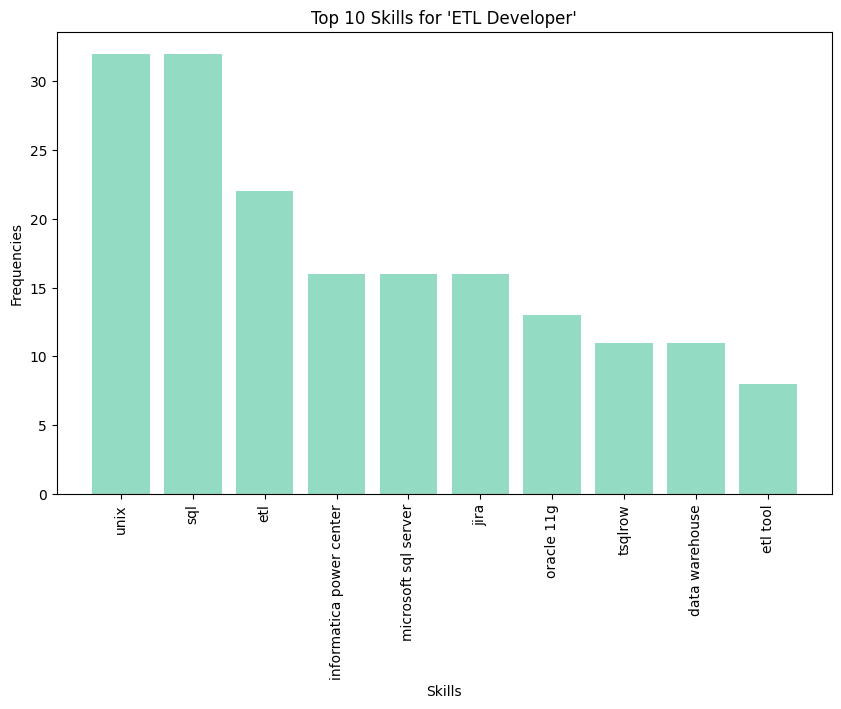

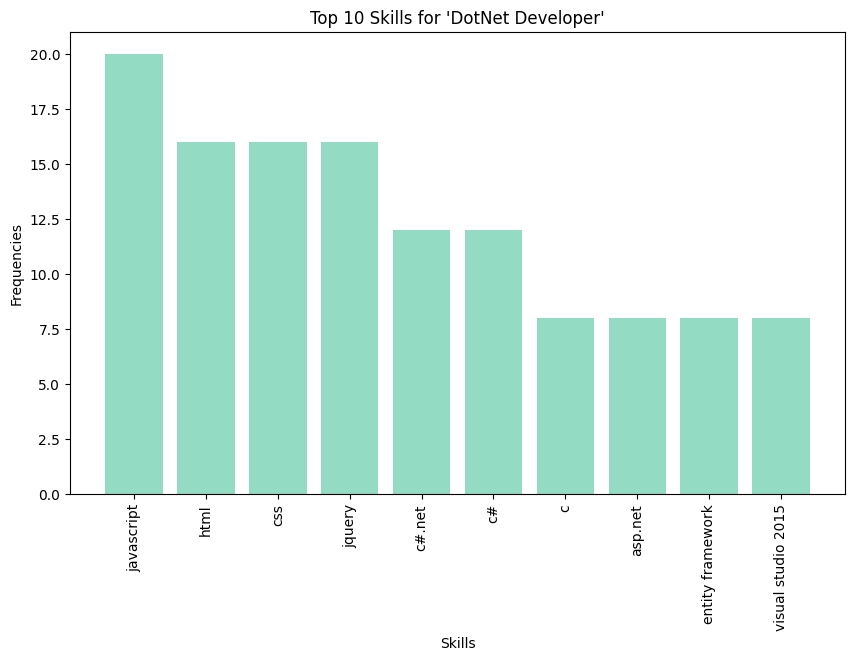

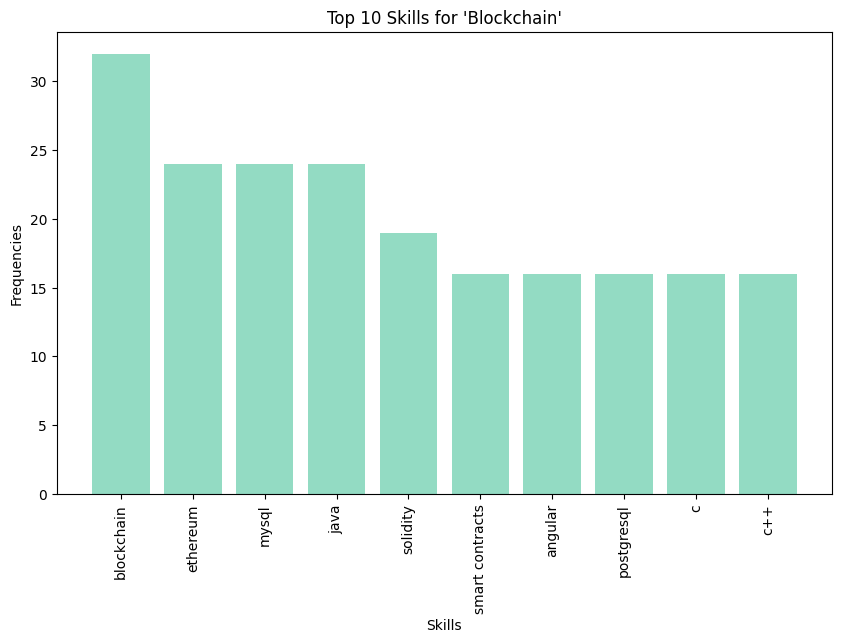

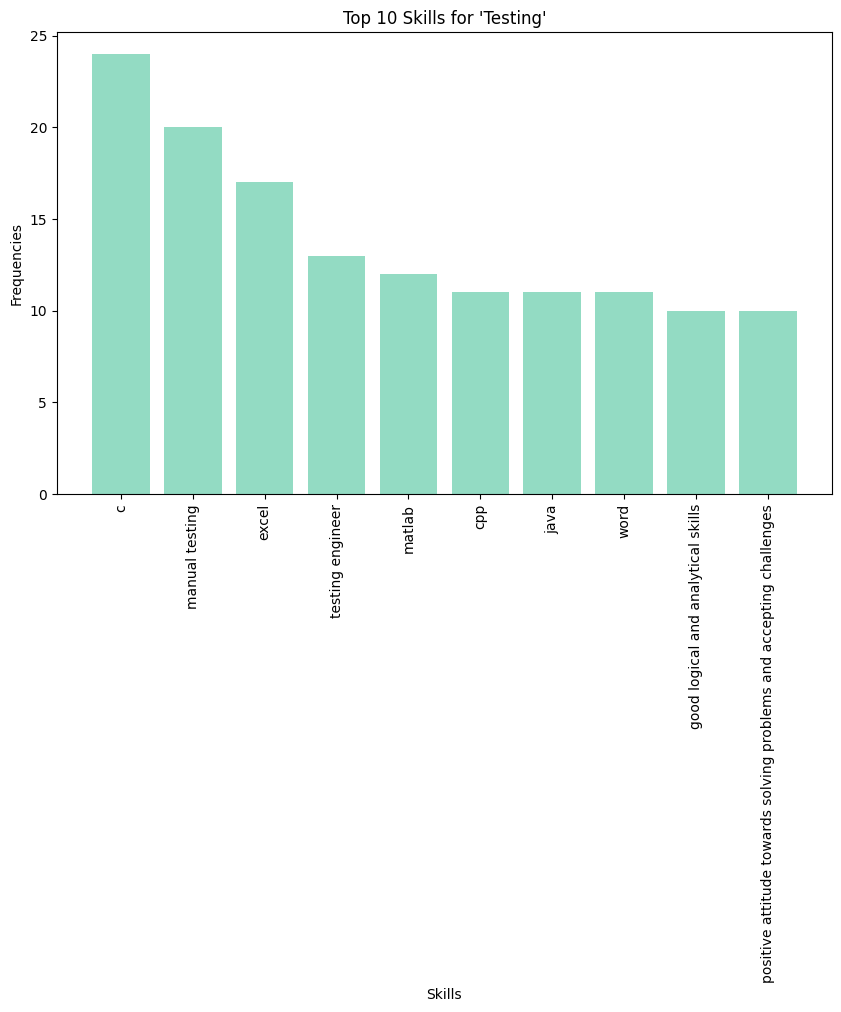

In [ ]:
import matplotlib.pyplot as plt

# Iterate over each job category in the dictionary
for category, word_frequencies in word_frequencies_by_category.items():
    # Get the top 10 most frequent words
    top_10_words = word_frequencies.most_common(10)

    # Extract words and their frequencies for plotting
    words, frequencies = zip(*top_10_words)

    # Create a new plot for the current category
    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies, alpha=0.7, color='#66CDAA')  # Set the color here
    plt.title(f"Top 10 Skills for '{category}'")
    plt.xlabel("Skills")  # X-axis label
    plt.ylabel("Frequencies")  # Y-axis label
    plt.xticks(rotation=90)
    plt.show()